In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings("ignore")

C:\Users\SANTIAGO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
#Importación de la info 
data = pd.read_csv(r'C:\Users\SANTIAGO\MIAD\3-Aprendizaje no supervisado\Proyecto final\Datos_AS.csv', delimiter=';', decimal=',')
marca = data.Marca
data.drop(columns=['Marca','Segmento','n'], inplace=True) #'Marca',
data['Ventas 2023'] = data['Ventas 2023']*2 #Corrección temporal en ventas

#Vraibles ordinales
data['Turbeidad'] = data['Turbeidad'].astype(int)
data['Cuerpo'] = data['Cuerpo'].astype(int)
data['Dulzor'] = data['Dulzor'].astype(int)
data['Astringencia'] = data['Astringencia'].astype(int)

#Variables quimicas
chem = list(data.columns)[0:7]
#Variables sensoriales
sens = list(data.columns)[7:11]
#Variables de ventas
ven = list(data.columns)[11:15]

print(data.info())
data.describe().T.round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seg_Categoria      52 non-null     object 
 1   Extracto Original  52 non-null     float64
 2   Extracto Aparente  52 non-null     float64
 3   Alcohol v/v        52 non-null     float64
 4   pH                 52 non-null     float64
 5   Color              52 non-null     float64
 6   Amargo             52 non-null     float64
 7   Turbeidad          52 non-null     int32  
 8   Cuerpo             52 non-null     int32  
 9   Dulzor             52 non-null     int32  
 10  Astringencia       52 non-null     int32  
 11  Ventas 2020        39 non-null     float64
 12  Ventas 2021        50 non-null     float64
 13  Ventas 2022        49 non-null     float64
 14  Ventas 2023        50 non-null     float64
dtypes: float64(10), int32(4), object(1)
memory usage: 5.4+ KB
None


,count,mean,std,min,25%,50%,75%,max
Extracto Original,52.0,10.31,1.80,4.43,9.74,10.50,11.34,15.75
Extracto Aparente,52.0,2.26,1.38,-0.48,1.92,2.20,2.66,6.64
Alcohol v/v,52.0,3.95,1.38,0.00,3.88,4.17,4.74,6.21
pH,52.0,4.32,0.24,3.50,4.27,4.39,4.47,4.61
Color,52.0,20.36,30.78,5.20,6.22,7.18,13.08,144.00
Amargo,52.0,16.28,7.97,1.50,10.62,16.25,18.85,44.40
Turbeidad,52.0,1.40,0.66,1.00,1.00,1.00,2.00,3.00
Cuerpo,52.0,2.35,0.71,1.00,2.00,2.00,3.00,4.00
Dulzor,52.0,2.46,0.83,1.00,2.00,2.00,3.00,5.00
Astringencia,52.0,2.79,0.96,1.00,2.00,3.00,3.00,5.00


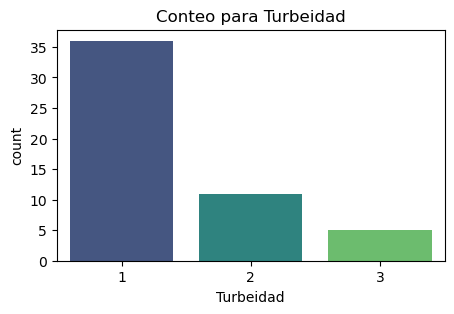

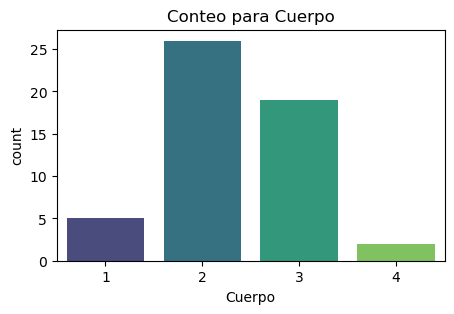

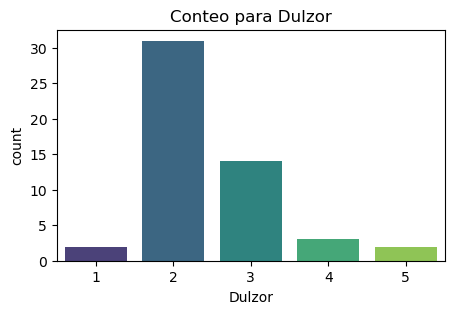

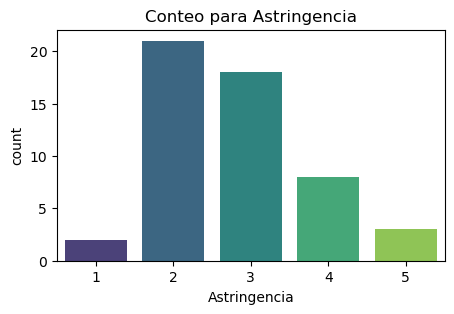

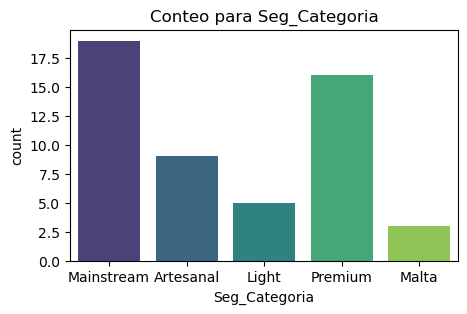

In [111]:
for categoria in sens+['Seg_Categoria']:
    plt.figure(figsize=(5, 3)) 
    sns.countplot(x =categoria, data=data, palette='viridis') # Personalizar el gráfico plt.xlabel('Categoría') plt.ylabel('Conteo') plt.title('Conteo por Categoría') plt.show()
    plt.title(f'Conteo para {categoria}')
    plt.show()   

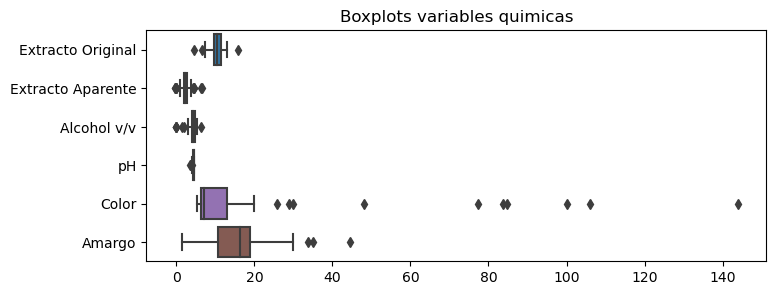

In [82]:
#Boxplots variables 
plt.figure(figsize=[8,3])
sns.boxplot(data[chem], orient='h')
plt.title("Boxplots variables quimicas")
plt.show()


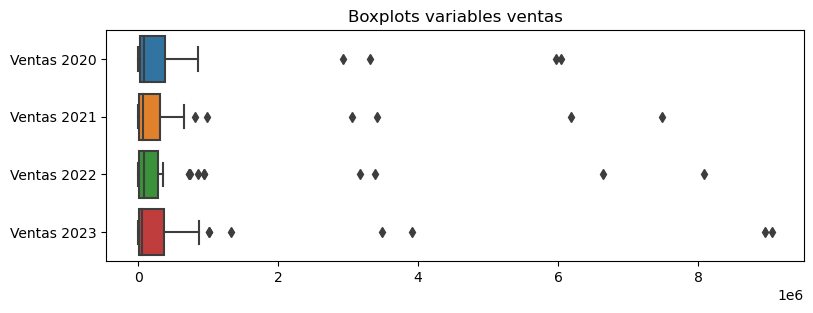

In [81]:
#Boxplots variables 
plt.figure(figsize=[9,3])
sns.boxplot(data[ven], orient='h')
plt.title("Boxplots variables de ventas")
plt.show()

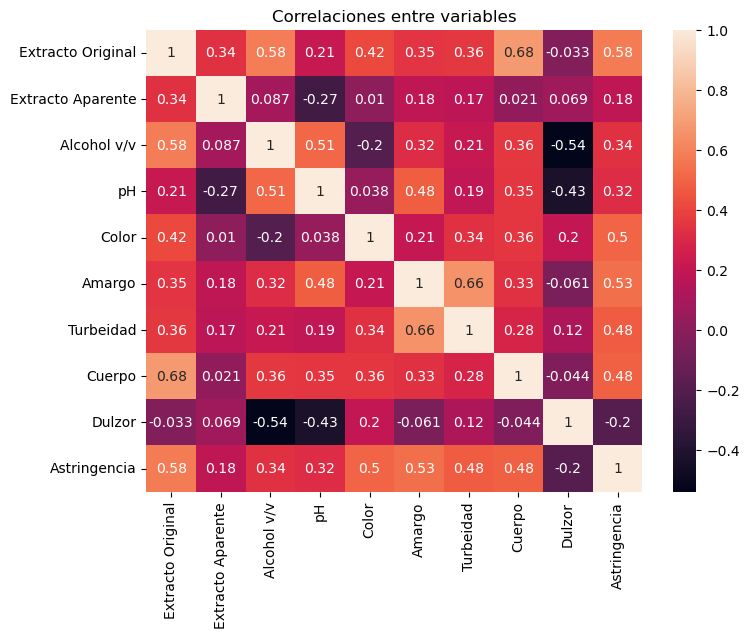

In [73]:
corr = data.drop(columns=ven+['Seg_Categoria']).corr()
plt.figure(figsize=[8,6])
sns.heatmap(corr, annot=True)
plt.title('Correlaciones entre variables')
plt.show()

<Figure size 1000x1000 with 0 Axes>

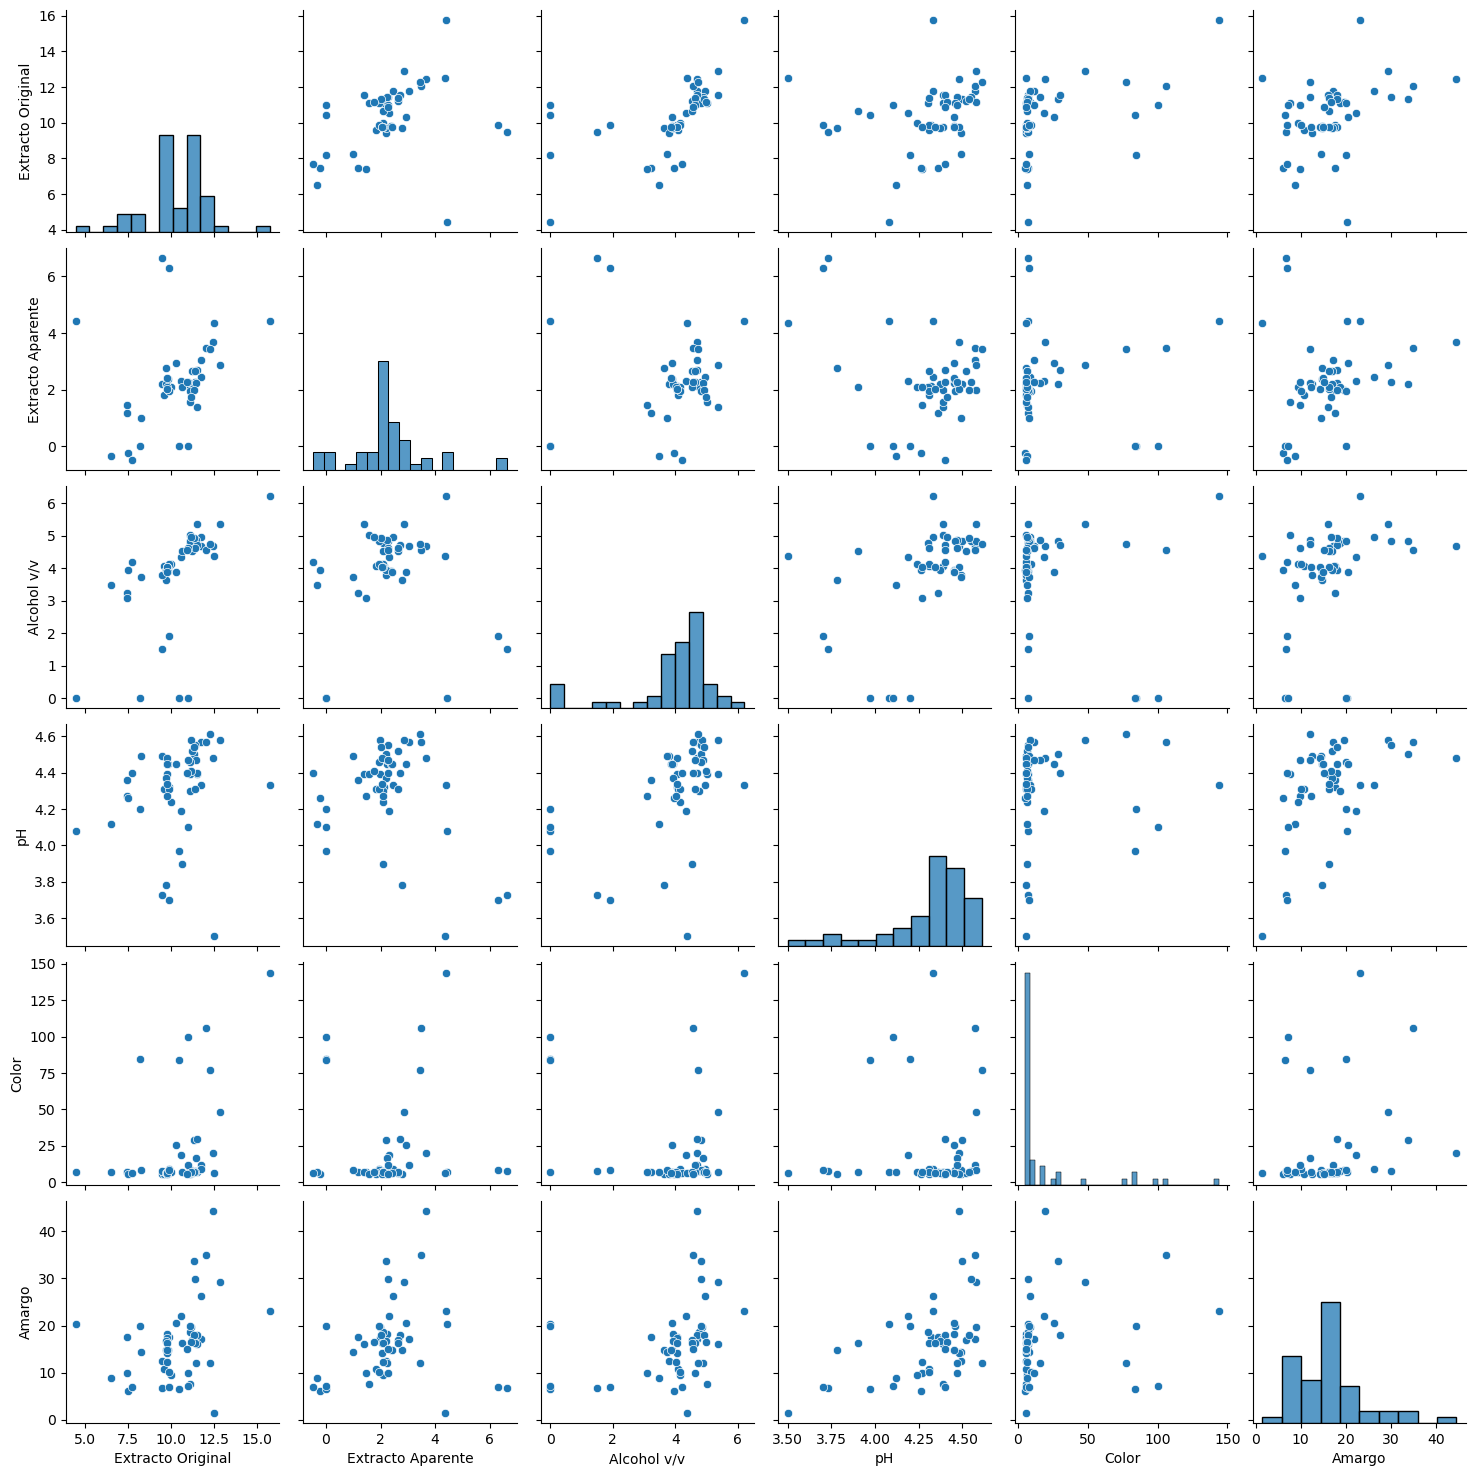

In [112]:
plt.figure(figsize=[10,10])
sns.pairplot(data[chem])
plt.
plt.show()

In [7]:
#Cálculo de tasa de cambio de ventas

data['Incremento 2021'] = (data['Ventas 2020'] -data['Ventas 2021']) / data['Ventas 2020']
data['Incremento 2022'] = (data['Ventas 2021'] -data['Ventas 2022']) / data['Ventas 2021']
data['Incremento 2023'] = (data['Ventas 2022'] -data['Ventas 2023']) / data['Ventas 2022']

In [9]:
data[['Incremento 2021','Incremento 2022','Incremento 2023']].describe()

,Incremento 2021,Incremento 2022,Incremento 2023
count,39.000000,49.000000,49.000000
mean,-inf,-0.607993,-0.135504
std,NaN,1.864535,0.729595
min,-inf,-10.744003,-2.783471
25%,-1.093697,-0.486250,-0.335692
50%,-0.235816,-0.117176,-0.099254
75%,-0.042012,0.072532,0.288057
max,0.530376,0.938388,0.893468
